In [2]:
import pandas as pd
import kagglehub
from datetime import datetime

# Download latest version
path = kagglehub.dataset_download("arnavsmayan/netflix-userbase-dataset")

print("Path to dataset files:", path)
df = pd.read_csv('/content/Netflix Userbase.csv')
df.head()


100%|██████████| 25.1k/25.1k [00:00<00:00, 11.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/arnavsmayan/netflix-userbase-dataset/versions/3


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


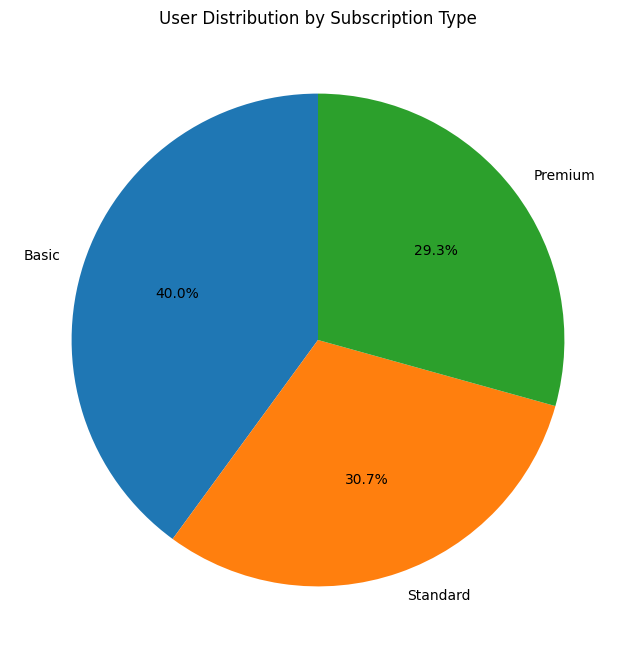

In [24]:
# @title User Distribution by Subscription Type

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'
subscription_counts = df['Subscription Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))

plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=90)
_ = plt.title('User Distribution by Subscription Type')
#plt.show()

In [3]:
date_object = datetime.now()
formatted_date = date_object.strftime("%d-%m-%Y")


In [4]:
subscription_counts = df['Subscription Type'].value_counts()
print(subscription_counts)

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64


In [16]:
basic_subscriptions = df[df['Subscription Type'].str.strip() == 'Basic']
basic_subscriptions.head(999)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
10,11,Basic,10,16-05-22,22-06-23,United States,31,Female,Smartphone,1 Month
13,14,Basic,10,01-08-22,26-06-23,Australia,27,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2488,2489,Basic,11,17-07-22,12-07-23,Australia,48,Female,Smartphone,1 Month
2491,2492,Basic,14,19-07-22,12-07-23,Brazil,29,Female,Laptop,1 Month
2494,2495,Basic,15,23-07-22,12-07-23,Italy,43,Female,Laptop,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month


In [19]:
basic_subscriptions = basic_subscriptions.copy()
basic_subscriptions.sort_values(by=['User ID', 'Last Payment Date'], inplace=True)
User_ID_LPD1=basic_subscriptions[['User ID','Subscription Type', 'Last Payment Date']]
User_ID_LPD1.head(999)

,User ID,Subscription Type,Last Payment Date
0,1,Basic,10-06-23
4,5,Basic,28-06-23
7,8,Basic,24-06-23
10,11,Basic,22-06-23
13,14,Basic,26-06-23
...,...,...,...
2488,2489,Basic,12-07-23
2491,2492,Basic,12-07-23
2494,2495,Basic,12-07-23
2496,2497,Basic,14-07-23


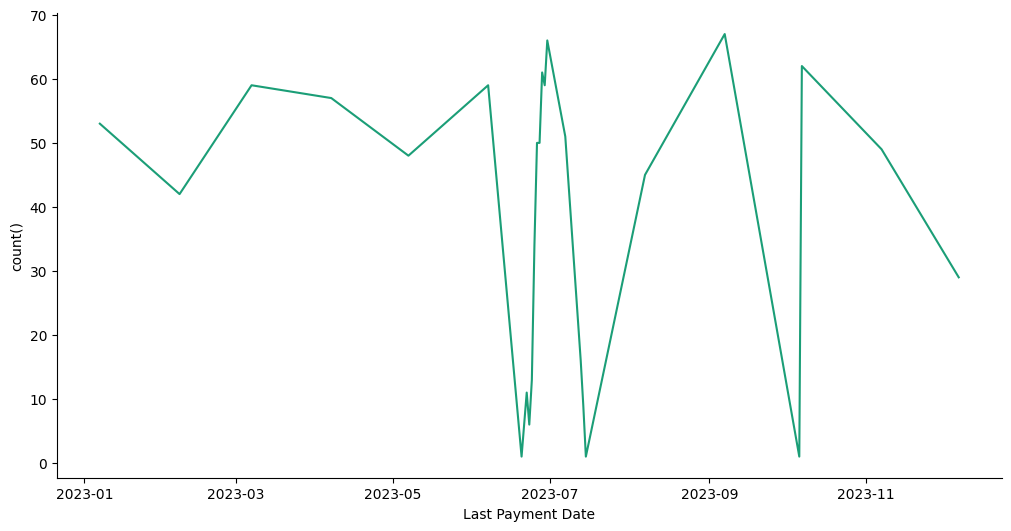

In [25]:
# @title Last Payment Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Last Payment Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Last Payment Date'}, axis=1)
              .sort_values('Last Payment Date', ascending=True))
  xs = counted['Last Payment Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = User_ID_LPD1.sort_values('Last Payment Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Last Payment Date')
_ = plt.ylabel('count()')

In [21]:
User_ID_LPD1['Last Payment Date'] = pd.to_datetime(User_ID_LPD1['Last Payment Date'])
start_date = datetime(2023, 6, 15)
end_date = datetime(2023, 7, 15)
out_of_range = User_ID_LPD1[(User_ID_LPD1['Last Payment Date'] < start_date) | (User_ID_LPD1['Last Payment Date'] > end_date)]
sum = out_of_range['Last Payment Date'].count()
print(sum)
out_of_range.head()


571


<ipython-input-21-a10ebfd7f7c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  User_ID_LPD1['Last Payment Date'] = pd.to_datetime(User_ID_LPD1['Last Payment Date'])


,User ID,Subscription Type,Last Payment Date
0,1,Basic,2023-10-06
631,632,Basic,2023-01-07
641,642,Basic,2023-01-07
701,702,Basic,2023-01-07
711,712,Basic,2023-01-07


In [8]:
standard_subscriptions = df[df['Subscription Type'] == 'Standard']
standard_subscriptions.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
12,13,Standard,12,30-11-21,27-06-23,United Kingdom,48,Female,Laptop,1 Month


In [9]:
standard_subscriptions = standard_subscriptions.copy()
standard_subscriptions['Last Payment Date'] = pd.to_datetime(standard_subscriptions['Last Payment Date'])
standard_subscriptions.sort_values(by=['User ID', 'Last Payment Date'], inplace=True)
User_ID_LPD2=standard_subscriptions[['User ID','Subscription Type', 'Last Payment Date']]
User_ID_LPD2.head()


<ipython-input-9-b9d6047b1759>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  standard_subscriptions['Last Payment Date'] = pd.to_datetime(standard_subscriptions['Last Payment Date'])


,User ID,Subscription Type,Last Payment Date
2,3,Standard,2023-06-27
3,4,Standard,2023-06-26
6,7,Standard,2023-06-25
8,9,Standard,2023-06-23
12,13,Standard,2023-06-27


In [10]:
User_ID_LPD2
start_date = datetime(2023, 11, 7)
end_date = datetime(2023, 12, 7)
out_of_range = User_ID_LPD2[(User_ID_LPD2['Last Payment Date'] < start_date) | (User_ID_LPD2['Last Payment Date'] > end_date)]
sum = out_of_range['Last Payment Date'].count()
print(sum)
out_of_range.head()

696


,User ID,Subscription Type,Last Payment Date
2,3,Standard,2023-06-27
3,4,Standard,2023-06-26
6,7,Standard,2023-06-25
8,9,Standard,2023-06-23
12,13,Standard,2023-06-27


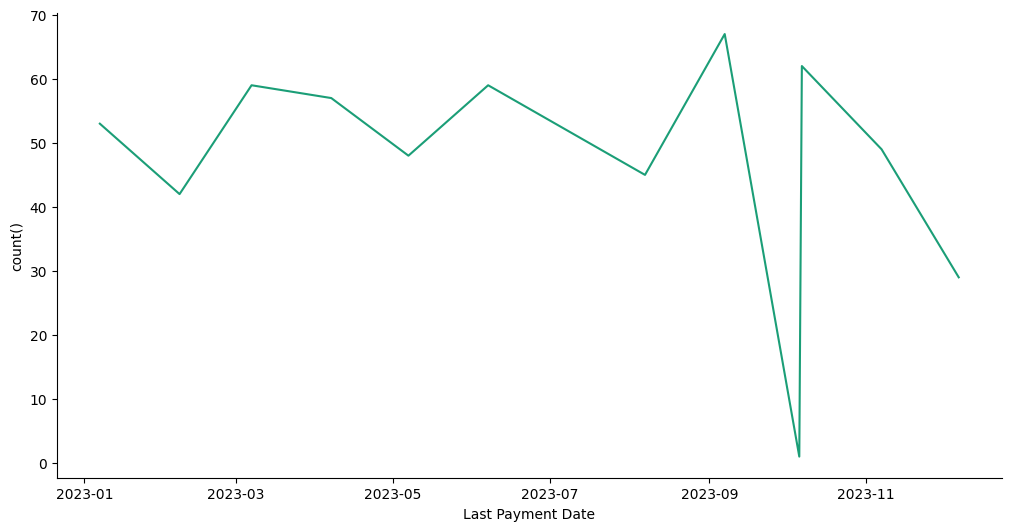

In [26]:
# @title Last Payment Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Last Payment Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Last Payment Date'}, axis=1)
              .sort_values('Last Payment Date', ascending=True))
  xs = counted['Last Payment Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = out_of_range.sort_values('Last Payment Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Last Payment Date')
_ = plt.ylabel('count()')

In [11]:
premium_subscription = df[df['Subscription Type'] == 'Premium']
premium_subscription.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month
11,12,Premium,15,23-03-23,28-06-23,Canada,45,Male,Tablet,1 Month
15,16,Premium,15,07-04-22,27-06-23,France,36,Male,Tablet,1 Month


In [14]:
premium_subscription = premium_subscription.copy()
premium_subscription['Last Payment Date'] = pd.to_datetime(premium_subscription['Last Payment Date'])
premium_subscription.sort_values(by=['User ID', 'Last Payment Date'], inplace=True)
User_ID_LPD3=premium_subscription[['User ID','Subscription Type', 'Last Payment Date']]
User_ID_LPD3.head(733)

,User ID,Subscription Type,Last Payment Date
1,2,Premium,2023-06-22
5,6,Premium,2023-06-27
9,10,Premium,2023-06-22
11,12,Premium,2023-06-28
15,16,Premium,2023-06-27
...,...,...,...
2484,2485,Premium,2023-12-07
2486,2487,Premium,2023-12-07
2490,2491,Premium,2023-11-07
2493,2494,Premium,2023-07-15


In [15]:
User_ID_LPD3
start_date = datetime(2023, 11, 7)
end_date = datetime(2023, 12, 7)
out_of_range = User_ID_LPD3[(User_ID_LPD3['Last Payment Date'] < start_date) | (User_ID_LPD3['Last Payment Date'] > end_date)]
sum = out_of_range['Last Payment Date'].count()
print(sum)
out_of_range.head()

678


,User ID,Subscription Type,Last Payment Date
1,2,Premium,2023-06-22
5,6,Premium,2023-06-27
9,10,Premium,2023-06-22
11,12,Premium,2023-06-28
15,16,Premium,2023-06-27


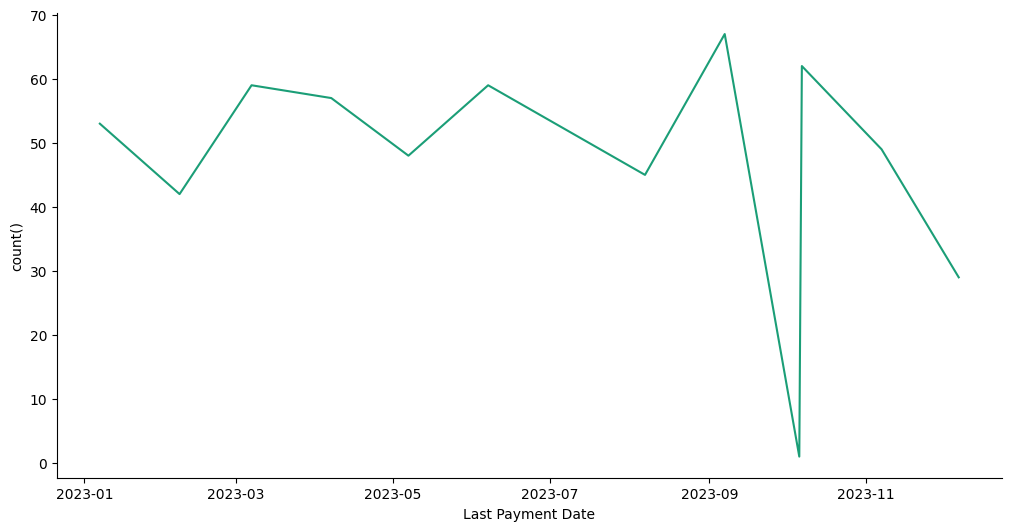

In [27]:
# @title Last Payment Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Last Payment Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Last Payment Date'}, axis=1)
              .sort_values('Last Payment Date', ascending=True))
  xs = counted['Last Payment Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = out_of_range.sort_values('Last Payment Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Last Payment Date')
_ = plt.ylabel('count()')